## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Mitchell de Bruyn

Student ID: 23296828

<hr style="border:2px solid gray"> </hr>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [2]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [3]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [4]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [5]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

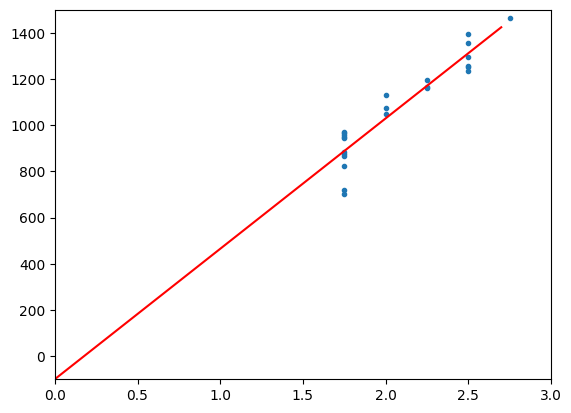

In [6]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task.

# Check the data

Well, this looks fun, before we start I want to have a look at the what data we're given.
I'm not doing anything with it, just want to see it so I can keep this in mind as I reverse engineer the examples.

In [7]:
# Don't need to reload the file, just keeping work self contained.
data = np.loadtxt('lr_data.csv', delimiter=',')
print(data)
print("=============")

X = data[:,0:2]
print("X = ")
print(X)
print("=============")

y= [[data[i,2]] for i in range(0,len(data[:,2]))]
print("y = ")
print(y)

[[1.000e+00 2.750e+00 1.464e+03]
 [1.000e+00 2.500e+00 1.394e+03]
 [1.000e+00 2.500e+00 1.357e+03]
 [1.000e+00 2.500e+00 1.293e+03]
 [1.000e+00 2.500e+00 1.256e+03]
 [1.000e+00 2.500e+00 1.254e+03]
 [1.000e+00 2.500e+00 1.234e+03]
 [1.000e+00 2.250e+00 1.195e+03]
 [1.000e+00 2.250e+00 1.159e+03]
 [1.000e+00 2.250e+00 1.167e+03]
 [1.000e+00 2.000e+00 1.130e+03]
 [1.000e+00 2.000e+00 1.075e+03]
 [1.000e+00 2.000e+00 1.047e+03]
 [1.000e+00 1.750e+00 9.650e+02]
 [1.000e+00 1.750e+00 9.430e+02]
 [1.000e+00 1.750e+00 9.580e+02]
 [1.000e+00 1.750e+00 9.710e+02]
 [1.000e+00 1.750e+00 9.490e+02]
 [1.000e+00 1.750e+00 8.840e+02]
 [1.000e+00 1.750e+00 8.660e+02]
 [1.000e+00 1.750e+00 8.760e+02]
 [1.000e+00 1.750e+00 8.220e+02]
 [1.000e+00 1.750e+00 7.040e+02]
 [1.000e+00 1.750e+00 7.190e+02]]
X = 
[[1.   2.75]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.25]
 [1.   2.25]
 [1.   2.25]
 [1.   2.  ]
 [1.   2.  ]
 [1.   2.  ]
 [1.   1.75]
 [1.   1.75]
 [1.   

# Calculating the weights

In the first function they use this monster of a thing:
```python
np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
```

Let's break this down.

## Transpose `X.T`

The numpy library has this `.T` property that calculates the transposed version of a matrix.
To transpose a matrix we want to write all the rows as columns. i.e.

For a given matrix $X$:
$$
X = \begin{bmatrix} 
	a & b & c \\
	d & e & f\\
	\end{bmatrix}
$$

I'm going to use the mnemonic Roman Catholic to remember to write the in the form Rows X Columns so this is a 2X3 matrix.

We can write the transpose of matrix $X$ as $X^T$ where
$$
X^T = \begin{bmatrix}
    a & d \\
    b & e \\
    c & f \\
    \end{bmatrix}
$$
After transforming this matrix the matrix is now a 3x2.

In python we're gong to represent a matrix as a list of lists, so for the matrix X shown above we can write the pseudo code like this:
```python
X = [[a,b,c], [d,e,f]]
```
Then the first row would be:
```python
X[0] = [a,b,c]
```
However getting the first column from this can be a pain and we'll need a loop e.g.
```python
first_column = [] # empty list
for row in X:
    first_column.append(row[0])

# first_column is now = [a,d]
```

In [8]:
# I'm leaving out type hinting for better readability
# And no error checking yet

def transpose_matrix(X):
    """
    Function to transpose a matrix
    """
    transposed_matrix = []
    # I'm using the convention where:
    # i - is the row index
    # j - is the column index
    
    # first lets loop over every column
    # for a 2x3 matrix j will be in the range [0, 1]
    #   Then for each column we loop over each row index j in the range [0,1,2]
    for j in range(len(X[0])): # loop over columns
        transposed_row = []
        for i in range(len(X)): # loop over rows

            transposed_row.append(X[i][j])

        transposed_matrix.append(transposed_row)

    return transposed_matrix

    

# Test transpose_matrix
m = [[1,2,3],[4,5,6]]
print(m)
print(transpose_matrix(m))
        
        

[[1, 2, 3], [4, 5, 6]]
[[1, 4], [2, 5], [3, 6]]


### Numpy dot function

The reference equation uses `.dot` a few times, but at a glans I think this is just doing matrix multiplication so I tried writing the equation in a few different ways:

```python
np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
np.matmul(np.linalg.inv(np.matmul(X.T, X)), (np.matmul(X.T, y)))
np.linalg.inv(X.T @ X) @ (X.T @ y)
```

I like to think about matrix multiplication in terms of dot products:

### Dot Product

If you have two vectors (arrays or lists) a and b that has the same shape, you can multiply each element to it's matching friend in the other adding all the results to get a single value result. e.g.

$$
\vec{a} = [1,2,3]
$$

$$
\vec{b} = [4,5,6]
$$

$$
\vec{a} \cdot \vec{b} = (1\times 4) + (2\times 5) + (3\times 6)
$$

Now Let's use this in Matrix Multiplication

### Matrix Multiplication using dot product

Let's do the matrix multiplication of a 2x3 matrix with a 3x2 matrix

$$
A = \begin{bmatrix} 
	a & b & c \\
	d & e & f\\
	\end{bmatrix}
$$
$$
B = \begin{bmatrix}
    u & v \\
    w & x \\
    y & z \\
    \end{bmatrix}
$$

$$
A \times B = \begin{bmatrix} 
	a & b & c \\
	d & e & f\\
	\end{bmatrix} \times \begin{bmatrix}
    u & v \\
    w & x \\
    y & z \\
    \end{bmatrix}
$$

Next let's consider the dot product for the first Row of A and first Column of B:

$$
A_{row1} = [a,b,c]
$$

$$
B_{col1} = \begin{bmatrix} u \\ w \\ y \\ \end{bmatrix}
$$

$$
A_{row1} \cdot B_{col1}  = [a,b,c] \cdot \begin{bmatrix} u \\ w \\ y \end{bmatrix} = (a\times u) + (b\times w) + (c\times y)
$$

This answer we can then put into our result matrix as the first element:

$$
C = \begin{bmatrix}
    A_{r1} \cdot B_{c1} & ? \\
    ? & ? \\
    \end{bmatrix}
$$

Completing the picture we get:

$$
C = \begin{bmatrix}
    A_{r1} \cdot B_{c1} & A_{r1} \cdot B_{c2} \\
    A_{r2} \cdot B_{c1} & A_{r2} \cdot B_{c2} \\
    \end{bmatrix}
$$

## Matrix Multiplication Code

When doing matrix multiplication the two matrices need to have comparable dimensions.

Using the idea of a dot product to do some of the inner working, $A_{row} \cdot B_{col}$ this tells us that for a matrix to have comparable dimensions.

Here we need to think carefully, the size of a row is determined by how many columns it has and the size of a column is given by the number of rows it has. Keeping this in mind if matrix A is (n x m) then a comparable matrix will need to have (m x o) such that

The number of columns in matrix A needs to match the number of rows in matrix B.


In [9]:
def dot(A, B):
    """
    does the dotproduct for two vectors

    """
    if len(A) != len(B):
        raise ValueError("vectors are incompatible")

    ans = 0
    for a,b in zip(A, B):
        ans += a*b

    return ans


def get_col(A, j):
    """
    returns the column j as a list form a Matrix A
    """

    col = []
    for i in range(len(A)):
        col.append(A[i][j])

    return col


def matmul(A, B):
    """
    Matrix multiplication, this function will multiply A x B and return C
    btw. this is aweful and should not be used for anything! Even the most basic of optimisations
    will improve the performance by orders of magnitude!

    This only illustrates how I remember how to do matrix multiplication by had.
    """
    num_rows_B = len(B)
    num_cols_A = len(A[0]) # length of the first row

    if num_cols_A != num_rows_B:
        raise ValueError("matrices are incompatible")


    C = []
    
    num_rows_A = len(A)
    num_cols_B = len(B[0])
    for i in range(num_rows_A):
        A_row_i = A[i]
        result_row = []
        for j in range(num_cols_B):
            B_col_j = get_col(B, j)
            
            result_row.append(dot(A_row_i, B_col_j))
            
        C.append(result_row)

    return C


# Test using an identity matrix e.g. A x 1 = A
A = [[1, 2], [3, 4]]
B = [[1, 0], [0, 1]]

print(f"A x B = {A} x {B}")
print(f"      = {matmul(A, B)}")

# Random other example that can be checked by hand.
A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]
print(f"A x B = {A} x {B}")
print(f"      = {matmul(A, B)}")


A x B = [[1, 2], [3, 4]] x [[1, 0], [0, 1]]
      = [[1, 2], [3, 4]]
A x B = [[1, 2, 3], [4, 5, 6]] x [[7, 8], [9, 10], [11, 12]]
      = [[58, 64], [139, 154]]


## Matrix inverse


The inverse of a matrix is defined such that for matrix A if you multiply this matrix by it's inverse $A^{-1}$ you will get the identity matrix.

$$
AA^{-1} = I
$$

where the Intetity matrix $I$ is a matrix with 1's down the diagonal e.g. for a 3x3 matrix.

$$
X^T = \begin{bmatrix}
    1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 1\\
    \end{bmatrix}
$$

There is a nice formula for calculating the inverse of a 2x2 matrix.

For a Matrix A
$$
A = \begin{bmatrix}
    a & b\\
    c & d\\
    \end{bmatrix}
$$

$$
A^{-1} = \frac{1}{ad-bc}\begin{bmatrix}
    d & -b\\
    -c & a\\
    \end{bmatrix}
$$

For larger matrices other methods like `Gauss-Jordan Elimination` are needed, but here we will only need the basics.

Looking back the the original requirement `np.linalg.inv((X.T.dot(X)))` They want the inverse of the $X^{T} \times X$
Since X is Nx2;  $X^T$ will be 2xN.
The result of $X^T \times X$ will then always be a 2x2 regardless of how many rows are in the original dateset.

In [10]:
def mat22_inv(A):
    """
    Calculate the inverse of a 2x2 matrix
    """
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError(f"Matrix has incorrect size for this function, expect 2x2 got: {len(A)}x{len(A[0])}")

    # Lets do this now then we can apply the formula without thinking about indices 
    a = A[0][0]
    b = A[0][1]
    c = A[1][0]
    d = A[1][1]

    det = (a*d - b*c)

    A_inv = [[d / det, -b / det], [-c / det, a / det]]

    return A_inv

I = [[1,0],[0,1]]
print("Test inversing the identity matrix, should do nothing:")
print(mat22_inv(I))
print("========")
print("Multilying a matrix with it's inverse should give the identity matrix so that's a nice test")
A = [[1,2], [3,4]]
A_inv = mat22_inv(A)

print(f"A = {A}")
print(f"A_inv = {A_inv}")
print("=======")
print(f"A x A_inv = {matmul(A, A_inv)}")
    

Test inversing the identity matrix, should do nothing:
[[1.0, 0.0], [0.0, 1.0]]
Multilying a matrix with it's inverse should give the identity matrix so that's a nice test
A = [[1, 2], [3, 4]]
A_inv = [[-2.0, 1.0], [1.5, -0.5]]
A x A_inv = [[1.0, 0.0], [0.0, 1.0]]


In [11]:
def new_linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    # return np.linalg.inv(X.T @ X) @ (X.T @ y)
    XT = transpose_matrix(X)
    return matmul(mat22_inv(matmul(XT, X)), matmul(XT, y))

weights = linreg_weights(X,y)
print(f"1: {weights.tolist()}") # using to list to match print formatting

weights = new_linreg_weights(X,y)
print(f"2: {weights}")


1: [[-99.46431881371154], [564.2038924930491]]
2: [[-99.46431881371245], [564.2038924930494]]


In [12]:
class Vector:
    """
    A class to represent one-dimensional tenson (Vector).

    Attributes:
        _x (list): Internal representation of the vector components.
    """
    __slots__ = ('_x',) # don't use this if you don't know what it does, better just to omit this.
    
    def __init__(self, x: list):
        """
        Constructor, creates the internal attributes.

        Args:
            x (list or Vector): Takes a 1D list or another vector

        Raises:
            ValueError: When using this class you should be prepared to handle ValueErrors.
                - errors on multidimentional lists as input
                - errors if input is not a list or vector
        """
        if isinstance(x, list):
            if not x: # I just don't want to think about this edge case today
                raise ValueError("Empty vectors are not supported")
            if not self._is_one_d(x):
                raise ValueError("multi-dimensional array detected, did you want to use a Matrix? Vectors only supports 1D tensors")
            self._x = x
        elif isinstance(x, Vector):
            self._x = x.data
        else:
            raise ValueError("can conly create a vector from a list or another Vector")

    def _is_one_d(self, x) -> bool:
        """Checks if the provided list is one-dimensional."""
        # We are going to check each element in the list to see that is is not an instance of a list
        # the all function will check that all the answers are True and then returns True
        return all(not isinstance(i, list) for i in x)
        
    def dot(self, y: 'Vector') -> float:
        """Computes the dot product of self._x with y"""
        if len(self._x) != len(y):
            raise ValueError("vectors are incompatible")
    
        ans = 0
        # using the zip function to create tuples matching up data from _x and y
        for a,b in zip(self._x, y.data):
            ans += a*b
        
        return ans

    # @property is fun because now we can just say something like Vector([1,2,3]).data
    @property
    def data(self) -> list:
        """Returns the internal list representing the vector."""
        return self._x

    def __len__(self) -> float:
        """
        Allows us to use the default len function e.g.
        a = Vector([1,2])
        print(len(a))
        # 2
        """
        return len(self._x)

    def __add__(self, y: 'Vector') -> 'Vector':
        """Overload + operator to do basic Vector addition, because that's the expected behaviour"""
        if len(self._x) != len(y):
            raise ValueError("vectors are incompatible")

        # sorry for the list comprehension but this is not important
        return Vector([a + b for a, b in zip(self._x, y.data)])
        
    def __sub__(self, y: 'Vector') -> 'Vector':
        """Overload - operator to do basic Vector subtraction"""
        if len(self._x) != len(y):
            raise ValueError("vectors are incompatible")

        # sorry for the list comprehension but this is not important
        return Vector([a - b for a, b in zip(self._x, y.data)])

    
    def __mul__(self, y: 'Vector' or float or int) -> 'Vector' or float:
        """Overload * operator to do dot product or scalar multiplication"""
        if isinstance(y, Vector):
            return self.dot(y)
        elif isinstance(y, (int, float)):
            return Vector([a * y for a in self._x])
        else:
            raise ValueError(f"Can only multiply with a scalar or a Vector {type(y)} is not supported")

    def __rmul__(self, y: float or int) -> 'Vector':
        """
        Allows scalar multiplication from the left.
        The normal * overload (__mul__) handles cases where a vector is on the left
        We need a special case __rmul__ where the vector is only on the right
        """
        return self.__mul__(y)

    
    def __str__(self):
        """
        Returns a pretty string representation of the vector.
        Now you can do this:
        a = Vector([1,2])
        print(a)
        # <1, 2>
        
        """
        return '<' + ', '.join(map(str, self._x)) + '>'

    def __repr__(self) -> str:
        """
        How to representat the vector e.g.

        a = Vector([1, 2])
        a
        # Output in terminal: Vector([1, 2])
        
        """
        return f"Vector({self._x})"

## very very basic tests for vector class
a = Vector([1,2])

# Let's demonstrate testing an error:
try:
    bad = Vector([[1]])
except ValueError as err:
    print(f"Error raised: {err}")

print(f"a x a = {a} x {a} = {a*a}")
print(f"a - a = {a} - {a} = {a-a}")
print(f"a + a = {a} + {a} = {a+a}")
print(f"a * 2 = {a} * 2 = {a*2}")
print(f"3 * a = 3 * {a} = {3*a}")
print("=====================================================================")
help(a)
print("=====================================================================")
a # Dropping a naked 'a' here to show the output from __repr__ :D  Expecting: Vector([[1],[2]])

Error raised: multi-dimensional array detected, did you want to use a Matrix? Vectors only supports 1D tensors
a x a = <1, 2> x <1, 2> = 5
a - a = <1, 2> - <1, 2> = <0, 0>
a + a = <1, 2> + <1, 2> = <2, 4>
a * 2 = <1, 2> * 2 = <2, 4>
3 * a = 3 * <1, 2> = <3, 6>
Help on Vector in module __main__ object:

class Vector(builtins.object)
 |  Vector(x: list)
 |  
 |  A class to represent one-dimensional tenson (Vector).
 |  
 |  Attributes:
 |      _x (list): Internal representation of the vector components.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, y: 'Vector') -> 'Vector'
 |      Overload + operator to do basic Vector addition, because that's the expected behaviour
 |  
 |  __init__(self, x: list)
 |      Constructor, creates the internal attributes.
 |      
 |      Args:
 |          x (list or Vector): Takes a 1D list or another vector
 |      
 |      Raises:
 |          ValueError: When using this class you should be prepared to handle ValueErrors.
 |              - errors o

Vector([1, 2])

In [13]:
class RowWrapper:
    """
    Helper class to allow us to do this trick:
    matrix.rows[0]    # get a row by index
    len(matrix.rows)  # number of rows in the matrix

    At this point the matrix class should have done most of the error handeling
    """
    def __init__(self, matrix_data):
        """super basic constructor to grabe the raw list or lists"""
        self._matrix_data = matrix_data

    def __getitem__(self, row_index: int) -> 'Vector':
        """
        Overwrite the [] to use rows as a array
        """
        if row_index < 0 or row_index >= len(self._matrix_data):
            raise IndexError("Row index out of bounds")
        return Vector(self._matrix_data[row_index])

    def __len__(self) -> int:
        """
        len should return then number of rows
        """
        return len(self._matrix_data)


class ColumnWrapper:
    """
    Helper class to allow us to do this trick:
    matrix.cols[0]    # get a column by index
    len(matrix.cols)  # number of columns in the matrix

    At this point the matrix class should have done most of the error handeling
    """
    def __init__(self, data):
        """super basic constructor to grabe the raw list or lists"""
        self._data = data

    def __getitem__(self, col_index: int) -> 'Vector':
        """
        Overwrite the [] to use cols as a array
        """
        if col_index < 0 or col_index >= len(self._data[0]):
            raise IndexError("Column index out of bounds")
        return Vector([row[col_index] for row in self._data])

    def __len__(self) -> int:
        """
        len should return then number of columns
        """
        return len(self._data[0]) if self._data else 0


class Matrix:
    """
    A class to represent a 2D tensor (Matrix).
    
    Attributes:
        _data (list): Internal 2D list representation of the matrix.
    """
    def __init__(self, data: list):
        """
        Matrix constructor

        Args:
            data (list or Matrix): A 2D list representing a Matrix

        Raises:
            ValueError: If not a 2D list or Matrix instance.
        """
        if isinstance(data, Matrix):
            self._data = data.data
        elif isinstance(data, list):
            if not list: # check for empty list
                raise ValueError("Input data is not a valid 2D list or Matrix instance")

            # Check all rows are lists and the same length
            row_length = len(data[0])
            if not all(isinstance(row, list) and len(row) == row_length for row in data):
                raise ValueError("Input data is not a valid 2D list or Matrix instance")

            self._data = data
        else:
            raise ValueError("Input data is not a valid 2D list or Matrix instance")

        self._rows = RowWrapper(self._data)
        self._cols = ColumnWrapper(self._data)
        self._num_rows, self._num_cols = len(self._data), len(self._data[0])
    
    @property
    def data(self) -> list:
        """Returns the internal list of lists"""
        return self._data

    
    def __repr__(self) -> str:
        """how to represent the matrix object"""
        return f"Matrix({self._data})"

    
    def __str__(self) -> str:
        """pretty string for matrix used in a print statment"""
        return str(self._data) # yeah it's boring but outputs: [[1, 2], [3, 4]]

    
    @property
    def shape(self) -> (int, int):
        """
        Returns the tuple: (num rows, num columns)

        This is such a common question that this property saves a lot of thinking
        Usage:
        a = Matrix([[1,2], [3,4]])
        a.shape # returns (2, 2)
        """
        return self._num_rows, self._num_cols

    
    @property
    def rows(self) -> 'Vector':
            """
            Returns a RowWrapper opbject than can be accessed using the [] and will return vectors

            Usage:
                m = Matrix([[1, 2], [3, 4])
                m.rows[0]
                # Outputs: Vector([1, 2]) 

            Raises:
                IndexError: If the row_index is out of bounds.
            """
            return self._rows

    
    @property
    def cols(self) -> 'Vector':
            """
            Returns a ColWrapper opbject than can be accessed using the [] and will return vectors

            Usage:
                m = Matrix([[1, 2], [3, 4])
                m.cols[0]
                # Outputs: Vector([1, 3]) 
    
            Raises:
                IndexError: If the row_index is out of bounds.
            """
            return self._cols

    
    def __add__(self, a: 'Matrix') -> 'Matrix':
        """
        Overload the + operator to allow for
        Matrix elementwise addition.

        Args:
            a (Matrix)

        Raises:
            ValueError if input not a vector or shape does not match
        """
        if not isinstance(a, Matrix):
            raise ValueError(f"addition only works with other matrices {type(a)} not supported")
        if self.shape != a.shape:
            raise ValueError(f"Can only add matrices of the same shape. {self.shape} != {a.shape}")

        # I'm getting lazy, please ask if you want me to expand this
        return Matrix([[self._data[i][j] + a._data[i][j] for j in range(len(self._data[0]))] for i in range(len(self._data))])

    
    def __sub__(self, a: 'Matrix') -> 'Matrix':
        """
        Overload the - operator, copy paste from __add__

        Args:
            a (Matrix)

        Raises:
            ValueError if input not a vector or shape does not match
        """
        if not isinstance(a, Matrix):
            raise ValueError(f"subtraction only works with other matrices {type(a)} not supported")
        if self.shape != a.shape:
            raise ValueError(f"Can only subtract matrices of the same shape. {self.shape} != {a.shape}")

        # I'm getting lazy, please ask if you want me to expand this
        return Matrix([[self._data[i][j] - a._data[i][j] for j in range(len(self._data[0]))] for i in range(len(self._data))])

    
    def __mul__(self, scalar: float) -> 'Matrix':
        """Default scalar multiplication where the matrix is on the left,
        will multiply each element by the scalar and return a matrix that has been scaled
        """
        if not isinstance(scalar, (int, float)):
            return NotImplemented

        # This is just easier as a list comprehension, please ask in the forum if I need to explain these.
        result_data = [[value * scalar for value in row] for row in self._data]
        return Matrix(result_data)

    
    def __rmul__(self, scalar: float) -> 'Matrix':
        """Allow for doing multiplication where the matrix is on the right
        Let's just turn this around so we can use the function above
        """
        return self * scalar

    # Finally after all that boiler plate code, let's do something useful.
    def __matmul__(self, other: 'Matrix') -> 'Matrix':
        """

        """
        if self._num_cols != other.shape[0]:  # shape[0] is the number of rows
            raise ValueError("Number of columns in the first matrix must equal the number of rows in the second matrix.")
        
        result = []
        for i in range(self._num_rows): # range over self num rows
            result_row = []
            for j in range(other.shape[1]):  # range over other num columns
                dot_product_result = self.rows[i] * other.cols[j]  # Using the dot product from Vector class
                result_row.append(dot_product_result)
            result.append(result_row)
        
        return Matrix(result)

    def transpose(self) -> 'Matrix':
        """
        Returns the transposed matrix.

        [1, 2] -> [1, 3]
        [3, 4]    [2, 4]
        """
        # First unpack the list of lists with *
        # zip(*[[1,2], [3, 4]])  gives two separate lists zip([1,2], [3, 4])
        # now the zip function actually does the right thing and the result is what we want.
        transposed_data = [list(row) for row in zip(*self._data)]
        return Matrix(transposed_data)

    @property
    def T(self) -> 'Matrix':
        """
        T property returns the transposed matrix
        Nice property to mirror the numpy behaviour.
        
        """
        return self.transpose()

    
    def det(self) -> float:
        """
        Returns the determinant of a 2x2 matrix:

        for a matrix:
        [a, b]
        [c, d]

        det = a * d - b * c

        Raises:
            NotImplementedError if matrix is not a 2x2
        """
        if self.shape != (2,2):
            raise NotImplementedError("det is only supported for 2x2 matrices.")

        a, b = self._data[0]
        c, d = self._data[1]
        return a * d - b * c


    def inv(self):
        """
        Returns the inverse of the matrix

        Raises:
            ValueError if matrix is singular or if matrix is singular (det = 0)
            NotImplementedError if matrix is not a 2x2
        """
        if self.shape != (2,2):
            raise NotImplementedError("Inverse is only supported for 2x2 matrices.")

        determinant = self.det()
        if determinant == 0:
            raise ValueError("Matrix is singular and cannot be inverted.")

        a, b = self._data[0]
        c, d = self._data[1]

        return Matrix([[d, -b], [-c, a]]) * (1/determinant)


m = Matrix([[1,2], [3, 4]])
print(f"m = {m}")
print(f"m.shape = {m.shape}")
print(f"m + m = {m + m}")
print(f"m - m = {m - m}")
print(f"m.rows[0] = {m.rows[0]}")
print(f"m.cols[1] = {m.cols[1]}")
print("======================================================================")
print(f"Matrix Multiplication: m @ m = {m @ m}")
print("======================================================================")
print(f"(Transpose matrix: m = {m}, m.T = {m.T}")
print("======================================================================")
print(f"m.det() = {m.det()}")
print("======================================================================")
print(f"m.inv() = {m.inv()}")

        

m = [[1, 2], [3, 4]]
m.shape = (2, 2)
m + m = [[2, 4], [6, 8]]
m - m = [[0, 0], [0, 0]]
m.rows[0] = <1, 2>
m.cols[1] = <2, 4>
Matrix Multiplication: m @ m = [[7, 10], [15, 22]]
(Transpose matrix: m = [[1, 2], [3, 4]], m.T = [[1, 3], [2, 4]]
m.det() = -2
m.inv() = [[-2.0, 1.0], [1.5, -0.5]]


In [14]:
# Reference tests
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y = [[data[i,2]] for i in range(0,len(data[:,2]))]

# This is the reference function:
w = (np.linalg.inv(X.T @ X) @ (X.T @ y))
print(f"Reference weights: {w.tolist()}") # convert ndarray to list to match in the print function
# Now can I do this with my classes?
# first convert into my expected types.
# X is actually a numpy.ndarray type, so need to change it to a list
# can check with:
# print(type(X))
Xm = Matrix(X.tolist())
ym = Matrix(y)

print("======================================================================")
print(f"Let me try, my weights: {(Xm.T @ Xm).inv() @ (Xm.T @ ym)}")


Reference weights: [[-99.46431881371245], [564.2038924930494]]
Let me try, my weights: [[-99.46431881371245], [564.2038924930494]]


In [15]:
class LinearRegression:
    """
    Class to do all the linear regression calculations
    """
    def __init__(self, X, y):
        self._X = X
        self._y = y
        self.fit()

    def fit(self):
        self._weights = (self._X.T @ self._X).inv() @ (self._X.T @ self._y)

    def get_weights(self) -> 'Matrix':
        return self._weights

    def get_params_X(self) -> 'Matrix':
        return self._X

    def get_params_y(self) -> 'Matrix':
        return self._y

    def predict(self, X) -> 'Matrix':
        out=[]
        for x in X:
            # had to fiddle with this a bit to match the format.
            out.append([self._weights.T.rows[0] * Vector(x)])

        return Matrix(out)




In [16]:

# Reference tests
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y = [[data[i,2]] for i in range(0,len(data[:,2]))]

# This is the reference function:
w = np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
print(f"Reference weights: {w.tolist()}")
p = linreg_predict(w,[[1,1], [1, 2]])
print(f"Reference predict at x = 1 and x = 2: {p.tolist()}")
print()
# My tests
l = LinearRegression(Matrix(X.tolist()), Matrix(y))
print(f"My weights: {l.get_weights()}")
print(f"My predict at x = 1 and x = 2: {l.predict([[1, 1], [1, 2]])}")



Reference weights: [[-99.46431881371154], [564.2038924930491]]
Reference predict at x = 1 and x = 2: [[464.7395736793376], [1028.9434661723867]]

My weights: [[-99.46431881371245], [564.2038924930494]]
My predict at x = 1 and x = 2: [[464.7395736793369], [1028.9434661723863]]


<hr style="border:2px solid gray"> </hr>

## Reflection

Write your reflection in below cell.